In [22]:
#iris datatset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [23]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [26]:
import io
iris = pd.read_csv(io.BytesIO(uploaded['Iris (1).csv']))

In [27]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#count the values for each column
iris.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

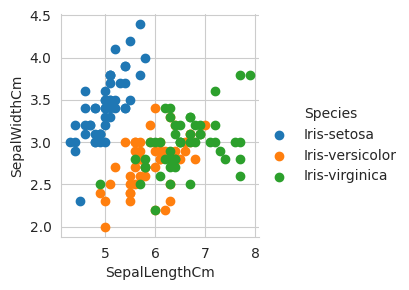

In [ ]:
#using seaborn data visualization by scatter plot

sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species')\
              .map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
              .add_legend()
plt.show()

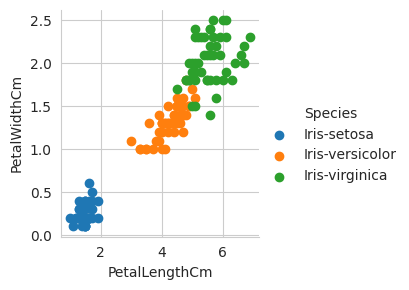

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species')\
              .map(plt.scatter,'PetalLengthCm','PetalWidthCm')\
              .add_legend()
plt.show()

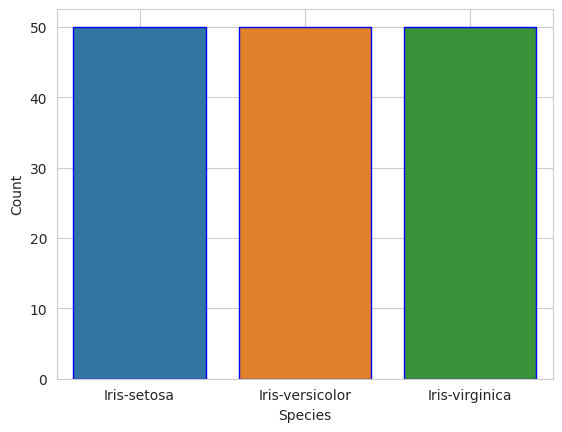

In [32]:
#displaying the count of species using countplot
sns.countplot(data=iris,x='Species',ec='blue')
plt.xlabel("Species")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [ ]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# Make the data X and Y
X=iris.drop('Species',axis=1)
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
Y = iris['Species']
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.24,random_state=20)
X_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
85,86,6.0,3.4,4.5,1.6
1,2,4.9,3.0,1.4,0.2
51,52,6.4,3.2,4.5,1.5
130,131,7.4,2.8,6.1,1.9
55,56,5.7,2.8,4.5,1.3


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

(114, 5)
(36, 5)
(36,)
(114,)


In [ ]:
# Creating a logestic regression model
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [ ]:
#Training accuracy
train_accuracy=model.score(X_train,Y_train)
print("The training accuracy is",train_accuracy)

The training accuracy is 0.9912280701754386


In [ ]:
#Testing accuracy
test_accuracy=model.score(X_test,Y_test)
print("The testing accuracy is",test_accuracy)

The testing accuracy is 0.9722222222222222
